In [7]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

Adapted from https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
## The Data

The data consists of participant characteristics such as demographics, addiction severity etc... The classification goal is to predict if a participant will show up (1/0) for their scheduled appointment. (target variable).

This dataset provides the participant information. It includes 3108 appointments (records) and 35 fields (features).

In [23]:
filename = r"C:/Users/Elan/No Show Prediction Project/input/Data_Combined_Cleaned_10.11.18_no_dummies.csv"
data = pd.read_csv(filename, index_col = 0)
print(data.shape)
print(list(data.columns))

(3108, 36)
['sex', 'age', 'years_edu', 'employment', 'monthly_income', 'marital_status', 'ethnicity', 'race', 'bmi', 'vetstatus', 'flyer', 'radio_ad', 'website', 'referral', 'previously_participated', 'craigslist', 'email_bulletin', 'other', 'facebook_ad', 'facebook_post', 'newspaper', 'bus_ad', 'billboard_ad', 'community_event', 'web search', 'smoker_status', 'cigs_per_day', 'alc_dep', 'thc_dep', 'stim_dep', 'opiate_dep', 'nic_dep', 'coke_dep', 'other_dep', 'audit_score', 'target']


In [24]:
data.describe()

,age,years_edu,monthly_income,bmi,vetstatus,flyer,radio_ad,website,referral,previously_participated,...,cigs_per_day,alc_dep,thc_dep,stim_dep,opiate_dep,nic_dep,coke_dep,other_dep,audit_score,target
count,3108.000000,3108.000000,3108.000000,3108.000000,3108.000000,3108.000000,3108.000000,3108.000000,3108.000000,3108.000000,...,3108.000000,3108.000000,3108.000000,3108.000000,3108.000000,3108.000000,3108.000000,3108.000000,3108.000000,3108.000000
mean,38.476892,12.916136,1109.284373,29.519952,0.075611,0.213320,0.005148,0.041506,0.355534,0.127091,...,15.008044,0.353282,0.171493,0.035714,0.051802,0.630309,0.168275,0.012227,9.573681,0.650257
std,12.049624,2.141975,1280.730545,6.823645,0.264418,0.409718,0.071576,0.199489,0.478752,0.333129,...,11.630105,0.478066,0.377000,0.185607,0.221662,0.482799,0.374171,0.109913,10.830468,0.476965
min,18.000000,0.000000,0.000000,15.188272,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,12.000000,200.000000,24.560602,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,12.000000,800.000000,29.657539,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,15.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5.000000,1.000000
75%,48.000000,14.000000,1500.000000,31.882021,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,20.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.000000,1.000000
max,66.000000,23.000000,12000.000000,63.872106,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,80.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,40.000000,1.000000


#### Input variables

1 - age (numeric)

2- years_edu (numeric)

3- monthly_income (numeric)

4- bmi (numeric)

5-vetstatus (binary:'1','0')

6- flyer (binary:'1','0')

7-radio_ad (binary:'1','0')

8-website (binary:'1','0')

9-referral (binary:'1','0')

10-previously_participated (binary:'1','0')	

11-craigslist (binary:'1','0')		

12-email_bulletin (binary:'1','0')		

13-other (binary:'1','0')	

14-facebook_ad (binary:'1','0')	

15-facebook_post (binary:'1','0')	

16-newspaper (binary:'1','0')	

17-bus_ad (binary:'1','0')	

18-billboard_ad (binary:'1','0')	

19-community_event (binary:'1','0')

20-web search (binary:'1','0')	

21-smoker_status (binary:'1','0')

22-cigs_per_day	(numeric)

23-alc_dep (binary:'1','0')

24-thc_dep (binary:'1','0')	

25-stim_dep (binary:'1','0')	

26-opiate_dep (binary:'1','0')

27-nic_dep (binary:'1','0')

28-coke_dep	(binary:'1','0')

29-other_dep (binary:'1','0') 

30- audit_score	(numeric)

31-marital_status (categorical: 'never married', 'divorced', 'married', 'separated', 'widowed')

32-ethnicity (categorical: 'not hispanic', 'hispanic', 'unknown')

33-race (categorical: 'white', 'african american', 'more than one race', 'other', 'american indian', 'asian', 'hawaian', 'unknown')

34-employment (categorical: unemployed', 'full time', 'part time')

35-sex (categorical: 'male', 'female')

#### Predict variable (desired target):

target - Did the participant show up for their appointment? (binary: '1','0')

The education column of the dataset has many categories and we need to reduce the categories for a better modelling. The education column has the following categories:

In [25]:
data.race.value_counts()

white                 2126
african american       775
more than one race      86
other                   41
american indian         18
asian                   13
hawaian                  7
unknown                  4
Name: race, dtype: int64

### Data exploration

In [29]:
data['target'].value_counts()

1    2021
0    1087
Name: target, dtype: int64

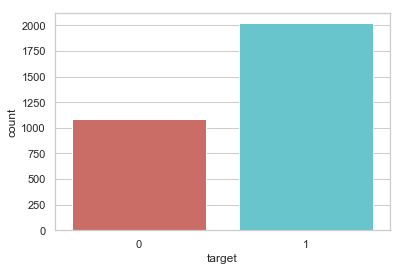

In [30]:
sns.countplot(x='target',data=data, palette='hls')
plt.show()

In [31]:
count_no_sub = len(data[data['target']==0])
count_sub = len(data[data['target']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no shows is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of shows", pct_of_sub*100)

percentage of no shows is 34.97425997425997
percentage of shows 65.02574002574003


Our classes are imbalanced, and the ratio of shows to no show instances is 65:35. Before we go ahead to balance the classes, Let's do some more exploration.

In [32]:
data.groupby('target').mean()

,age,years_edu,monthly_income,bmi,vetstatus,flyer,radio_ad,website,referral,previously_participated,...,smoker_status,cigs_per_day,alc_dep,thc_dep,stim_dep,opiate_dep,nic_dep,coke_dep,other_dep,audit_score
target,,,,,,,,,,,,,,,,,,,,,
0,36.117000,12.746806,1047.007360,29.239930,0.078197,0.185833,0.008280,0.034039,0.271389,0.089236,...,0.775529,14.494020,0.311868,0.148114,0.022079,0.050598,0.523459,0.134315,0.012879,9.620975
1,39.746165,13.007210,1142.780223,29.670562,0.074221,0.228105,0.003464,0.045522,0.400792,0.147452,...,0.785750,15.284513,0.375557,0.184067,0.043048,0.052449,0.687778,0.186541,0.011875,9.548243


Observations:

The data appears to be very similar in both target groups.

We can calculate categorical means for other categorical variables such as education and marital status to get a more detailed sense of our data.

In [33]:
data.groupby('employment').mean()

,age,years_edu,monthly_income,bmi,vetstatus,flyer,radio_ad,website,referral,previously_participated,...,cigs_per_day,alc_dep,thc_dep,stim_dep,opiate_dep,nic_dep,coke_dep,other_dep,audit_score,target
employment,,,,,,,,,,,,,,,,,,,,,
full time,37.959866,13.602802,2057.526566,29.634093,0.070234,0.222965,0.006689,0.059086,0.253066,0.070234,...,12.518395,0.280936,0.098105,0.022297,0.033445,0.521739,0.092531,0.002230,8.454849,0.682274
part time,36.700337,13.015391,992.492424,29.610813,0.065657,0.235690,0.001684,0.031987,0.321549,0.148148,...,13.286195,0.350168,0.198653,0.020202,0.047138,0.592593,0.156566,0.021886,9.518519,0.627946
unemployed,39.484484,12.493440,622.112730,29.422840,0.084231,0.203927,0.005700,0.036099,0.434452,0.154528,...,17.399620,0.403420,0.207093,0.050032,0.065231,0.720709,0.219126,0.014566,10.407853,0.655478


In [34]:
data.groupby('marital_status').mean()

,age,years_edu,monthly_income,bmi,vetstatus,flyer,radio_ad,website,referral,previously_participated,...,cigs_per_day,alc_dep,thc_dep,stim_dep,opiate_dep,nic_dep,coke_dep,other_dep,audit_score,target
marital_status,,,,,,,,,,,,,,,,,,,,,
divorced,46.878882,12.987133,1171.163043,29.428569,0.122671,0.248447,0.009317,0.020186,0.392857,0.166149,...,16.054348,0.380435,0.144410,0.027950,0.066770,0.683230,0.211180,0.004658,9.666149,0.701863
married,41.602094,13.460982,1694.082164,30.800552,0.090750,0.188482,0.005236,0.076789,0.251309,0.115183,...,14.808028,0.235602,0.123909,0.034904,0.045375,0.567190,0.089005,0.017452,7.684119,0.661431
never married,33.290757,12.835045,923.956194,29.144955,0.046855,0.196406,0.003209,0.045571,0.382542,0.122593,...,14.628370,0.397946,0.206675,0.038511,0.045571,0.621951,0.175225,0.016046,10.699615,0.637356
separated,39.023148,12.255289,829.435185,29.233971,0.134259,0.259259,0.009259,0.004630,0.412037,0.078704,...,15.856481,0.370370,0.212963,0.060185,0.078704,0.712963,0.231481,0.000000,8.842593,0.643519
widowed,48.675000,11.925000,912.825000,29.213415,0.025000,0.400000,0.000000,0.000000,0.287500,0.175000,...,19.562500,0.212500,0.000000,0.000000,0.050000,0.875000,0.162500,0.000000,6.525000,0.712500


In [35]:
data.groupby('race').mean()

,age,years_edu,monthly_income,bmi,vetstatus,flyer,radio_ad,website,referral,previously_participated,...,cigs_per_day,alc_dep,thc_dep,stim_dep,opiate_dep,nic_dep,coke_dep,other_dep,audit_score,target
race,,,,,,,,,,,,,,,,,,,,,
african american,39.430968,12.149769,741.609355,29.670566,0.067097,0.233548,0.001290,0.032258,0.501935,0.185806,...,15.952258,0.516129,0.338065,0.015484,0.033548,0.732903,0.356129,0.014194,13.314839,0.659355
american indian,45.222222,12.972222,315.111111,25.677396,0.222222,0.277778,0.000000,0.000000,0.388889,0.000000,...,18.833333,0.333333,0.111111,0.000000,0.000000,0.833333,0.055556,0.000000,11.000000,0.611111
asian,29.384615,14.923077,1107.692308,24.604754,0.230769,0.384615,0.076923,0.000000,0.000000,0.230769,...,9.076923,0.000000,0.000000,0.000000,0.000000,0.384615,0.230769,0.000000,4.307692,0.923077
hawaian,36.428571,10.714286,1797.142857,31.366646,0.000000,0.000000,0.000000,0.000000,0.285714,0.000000,...,6.285714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.285714
more than one race,32.744186,12.906977,747.988372,31.803147,0.069767,0.104651,0.000000,0.011628,0.616279,0.139535,...,14.500000,0.290698,0.209302,0.034884,0.023256,0.697674,0.058140,0.011628,9.011628,0.593023
other,30.658537,13.975610,1369.804878,29.843477,0.024390,0.048780,0.000000,0.121951,0.292683,0.000000,...,9.658537,0.292683,0.195122,0.024390,0.024390,0.365854,0.024390,0.000000,7.634146,0.707317
unknown,33.750000,14.750000,1350.000000,28.196994,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,...,6.750000,0.500000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,12.000000,0.500000
white,38.554092,13.168592,1260.845522,29.405555,0.079492,0.216369,0.006585,0.046096,0.301505,0.111007,...,15.088899,0.307150,0.113829,0.044685,0.062088,0.608655,0.111477,0.012230,8.465193,0.659454


In [36]:
data.groupby('sex').mean()

,age,years_edu,monthly_income,bmi,vetstatus,flyer,radio_ad,website,referral,previously_participated,...,cigs_per_day,alc_dep,thc_dep,stim_dep,opiate_dep,nic_dep,coke_dep,other_dep,audit_score,target
sex,,,,,,,,,,,,,,,,,,,,,
female,38.729334,13.136613,1137.904603,30.706501,0.026017,0.208139,0.004003,0.048699,0.318879,0.126084,...,14.541694,0.288192,0.123416,0.032688,0.049366,0.639760,0.142762,0.012008,7.851901,0.647098
male,38.252156,12.706652,1085.818246,28.400458,0.123193,0.220616,0.006285,0.035198,0.394092,0.129478,...,15.617222,0.418605,0.218730,0.038969,0.054683,0.628536,0.194217,0.012571,11.304211,0.660591


In [37]:
data.bmi.value_counts().head()

29.657539    657
24.389796     22
29.950296     19
22.707730     19
20.358654     18
Name: bmi, dtype: int64

Visualizations

Text(0,0.5,'Frequency of Show')

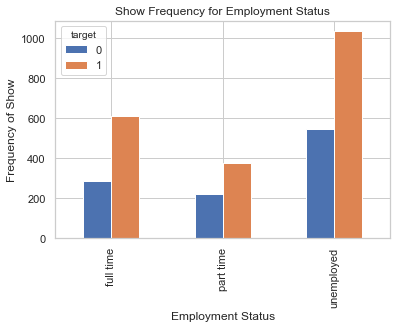

In [38]:
%matplotlib inline
pd.crosstab(data.employment,data.target).plot(kind='bar')
plt.title('Show Frequency for Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Frequency of Show')

The frequency of show and no show appears to be higher for unemployed. This makes sense because many of our participants are motivated to do our research studies because they are unemployed and need money. Full time employment appears to reflect more reliability for appointment attendance.

Text(0,0.5,'Proportion of Show')

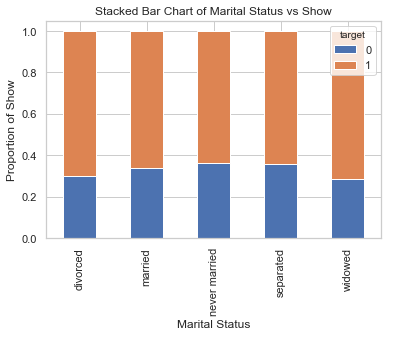

In [39]:
table=pd.crosstab(data.marital_status,data.target)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Show')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Show')

Hard to see, but the marital status does not seem a strong predictor for the outcome variable.

Text(0,0.5,'Proportion of Show')

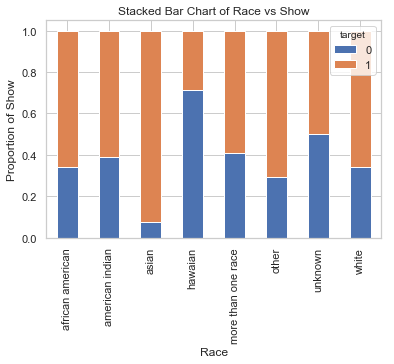

In [40]:
table=pd.crosstab(data.race,data.target)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Race vs Show')
plt.xlabel('Race')
plt.ylabel('Proportion of Show')

Hawaians appear to have a higher than average no show rate, however....

In [41]:
data.race.value_counts()

white                 2126
african american       775
more than one race      86
other                   41
american indian         18
asian                   13
hawaian                  7
unknown                  4
Name: race, dtype: int64

There is a very small amount of hawaians in the overall sample.

Text(0,0.5,'Frequency of Show')

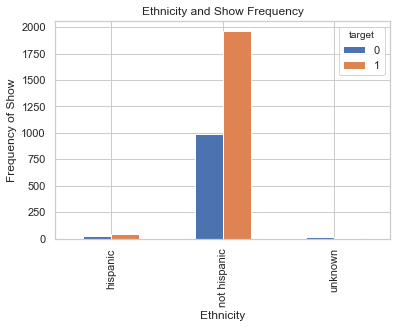

In [42]:
pd.crosstab(data.ethnicity,data.target).plot(kind='bar')
plt.title('Ethnicity and Show Frequency')
plt.xlabel('Ethnicity')
plt.ylabel('Frequency of Show')

This incidence of anything over than non hispanic is so low that this does not appear to be a good feature to include.

Text(0,0.5,'Frequency of Show')

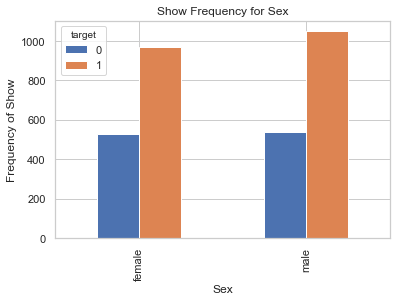

In [43]:
pd.crosstab(data.sex,data.target).plot(kind='bar')
plt.title('Show Frequency for Sex')
plt.xlabel('Sex')
plt.ylabel('Frequency of Show')

Sex appears to not be a very good predictor of show rate.

Text(0,0.5,'Frequency')

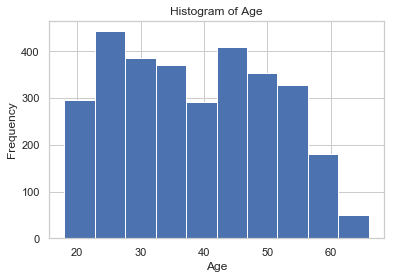

In [44]:
data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

All participants must be between the ages of 18-65 in order to participate.

Text(0,0.5,'Age')

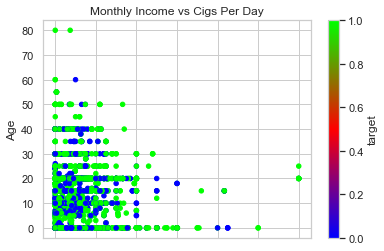

In [45]:
data.plot(x='monthly_income',y='cigs_per_day',kind='scatter', c='target', cmap='brg')
plt.title('Monthly Income vs Cigs Per Day')
plt.xlabel('Monthly Income')
plt.ylabel('Age')

Text(0,0.5,'Age')

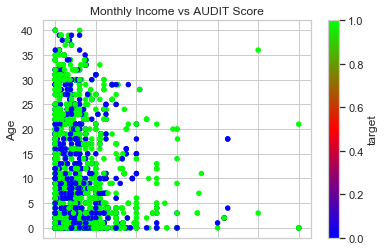

In [46]:
data.plot(x='monthly_income',y='audit_score',kind='scatter', c='target', cmap='brg')
plt.title('Monthly Income vs AUDIT Score')
plt.xlabel('Monthly Income')
plt.ylabel('Age')

Text(0,0.5,'Proportion of Show')

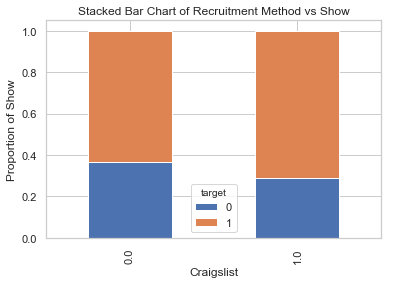

In [47]:
table=pd.crosstab(data.craigslist,data.target)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Recruitment Method vs Show')
plt.xlabel('Craigslist')
plt.ylabel('Proportion of Show')

Text(0,0.5,'Proportion of Show')

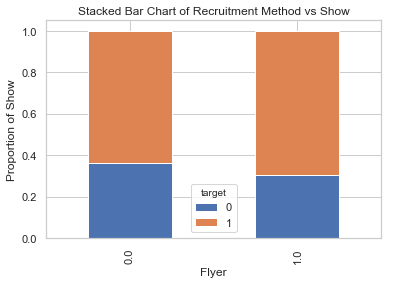

In [48]:
table=pd.crosstab(data.flyer,data.target)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Recruitment Method vs Show')
plt.xlabel('Flyer')
plt.ylabel('Proportion of Show')

Text(0,0.5,'Proportion of Show')

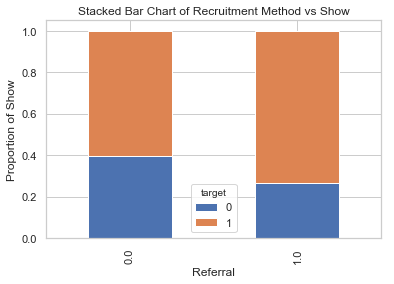

In [49]:
table=pd.crosstab(data.referral,data.target)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Recruitment Method vs Show')
plt.xlabel('Referral')
plt.ylabel('Proportion of Show')

### Create dummy variables

In [50]:
data_final = pd.get_dummies(data)

### Over-sampling using SMOTE

In [51]:
X = data_final.loc[:, data_final.columns != 'target']
y = data_final.loc[:, data_final.columns == 'target']

In [65]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no show in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of show",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no show data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of show data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  2796
Number of no show in oversampled data 1398
Number of show 1398
Proportion of no show data in oversampled data is  0.5
Proportion of show data in oversampled data is  0.5


c:\python36\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Implementing the model

### Logistic Regression Model Fitting

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

c:\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\python36\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [61]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.73


### Confusion Matrix

[[100 210]
 [ 46 577]]


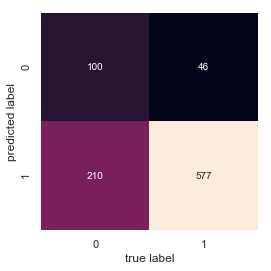

In [62]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.32      0.44       310
           1       0.73      0.93      0.82       623

   micro avg       0.73      0.73      0.73       933
   macro avg       0.71      0.62      0.63       933
weighted avg       0.72      0.73      0.69       933



#### Interpretation:

Of the entire test set, 73% of the predicted shows were actually shows. Of the entire test set, 72% were correctly guessed.

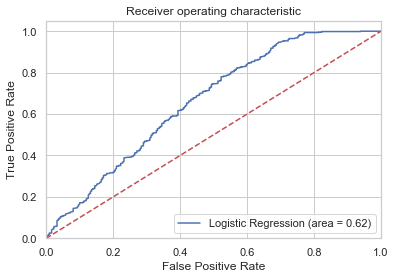

In [64]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()